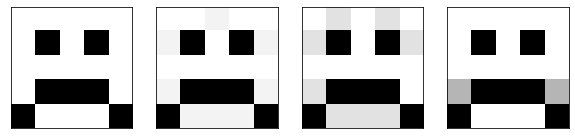

In [5]:
#Process of Creating a simple GAN
#Scenario:
#We want to generate a sad face 5x5 matrix
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

#Plotting Function
def view_samples(samples,m,n):
    fig, axes = plt.subplots(figsize=(10,10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(),samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((5,5)), cmap='Greys_r')
    return fig, axes

faces = [np.array([0,0,0,0,0,
                   0,1,0,1,0,
                   0,0,0,0,0,
                   0,1,1,1,0,
                   1,0,0,0,1]),
         np.array([0,0,0.10,0,0,
                   0.1,1,0,1,0.1,
                   0,0,0,0,0,
                   0.1,1,1,1,0.1,
                   1,0.1,0.1,0.1,1]),
         np.array([0,0.2,0,0.2,0,
                   0.2,1,0,1,0.2,
                   0,0,0,0,0,
                   0.2,1,1,1,0,
                   1,0.2,0.2,0.2,1]),
         np.array([0,0,0,0,0,
                   0,1,0,1,0,
                   0,0,0,0,0,
                   0.4,1,1,1,0.4,
                   1,0,0,0,1])]

_ = view_samples(faces, 1,4)

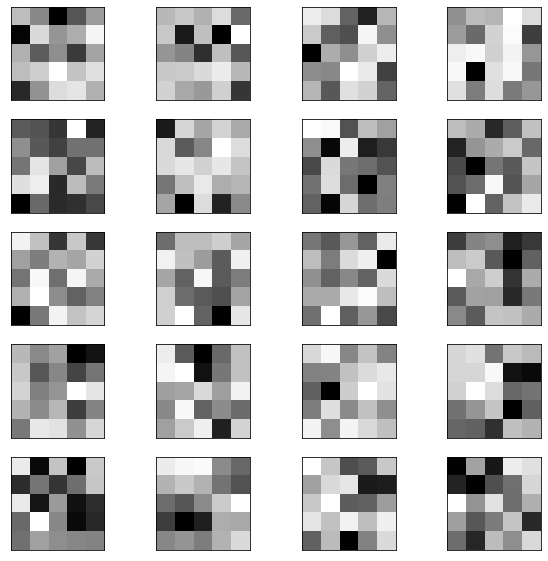

In [6]:
noise = [np.random.randn(5,5) for i in range(20)]
def generate_noise():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 5,4)

In [7]:
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [15]:
class Discriminator():
    def __init__(self):
        #self.weights = np.array([0.0 for i in range(4)])
        #self.bias = 0.0
        self.weights = np.array([np.random.normal() for i in range(25)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_image(self, image):
        prediction = self.forward(image)
        # We want the prediction to be 1, so the error is -log(prediction)
        return -np.log(prediction)
    
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        return -np.log(1-prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

In [9]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(25)])
        self.biases = np.array([np.random.normal() for i in range(25)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

In [16]:
# Set random seed
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# The GAN
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for face in faces:
        
        # Update the discriminator weights from the real face
        D.update_from_image(face)
    
        # Pick a random number to generate a fake face
        z = random.rand()

        # Calculate the discriminator error
        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
        
        # Calculate the generator error
        errors_generator.append(G.error(z, D))
        
        # Build a fake face
        noise = G.forward(z)
        
        # Update the discriminator weights from the fake face
        D.update_from_noise(noise)
    
        # Update the generator weights from the fake face
        G.update(z, D)

ValueError: shapes (4,) and (25,) not aligned: 4 (dim 0) != 25 (dim 0)

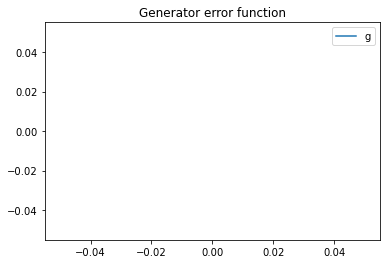

Text(0.5, 1.0, 'Discriminator error function')

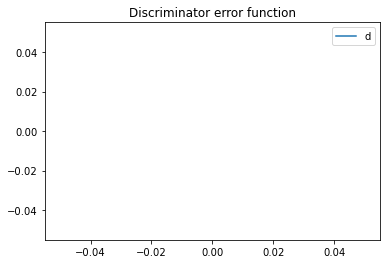

In [11]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error function")

ValueError: cannot reshape array of size 4 into shape (5,5)

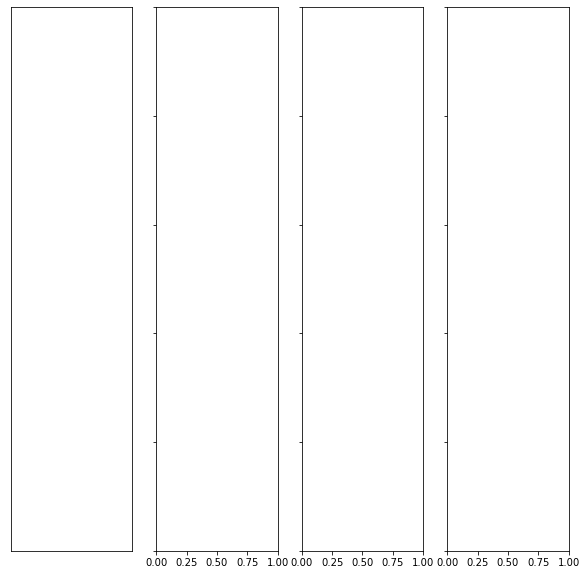

In [12]:
generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
    print(i)

In [13]:
print("Generator weights", G.weights)
print("Generator biases", G.biases)

Generator weights [-0.23413696  1.57921282  0.76743473 -0.46947439]
Generator biases [ 0.54256004 -0.46341769 -0.46572975  0.24196227]


In [14]:
print("Discriminator weights", D.weights)
print("Discriminator bias", D.bias)

Discriminator weights [ 0.49671415 -0.1382643   0.64768854  1.52302986]
Discriminator bias -0.23415337472333597
